In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import shutil

In [66]:
%%writefile download.sh

#!/bin/bash
fileid="$1"
filename="$2"
html=`curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}"`
curl -Lb ./cookie "https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" -o ${filename}

Writing download.sh


In [67]:
# Download the train set
!bash download.sh 1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV rps.zip

# Download the test set
!bash download.sh 1RaodrRK1K03J_dGiLu8raeUynwmIbUaM rps-test-set.zip

grep: invalid option -- P
usage: grep [-abcdDEFGHhIiJLlMmnOopqRSsUVvwXxZz] [-A num] [-B num] [-C[num]]
	[-e pattern] [-f file] [--binary-files=value] [--color=when]
	[--context[=num]] [--directories=action] [--label] [--line-buffered]
	[--null] [pattern] [file ...]
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2202    0  2202    0     0   6474      0 --:--:-- --:--:-- --:--:--     0    0 --:--:-- --:--:-- --:--:--  6672
grep: invalid option -- P
usage: grep [-abcdDEFGHhIiJLlMmnOopqRSsUVvwXxZz] [-A num] [-B num] [-C[num]]
	[-e pattern] [-f file] [--binary-files=value] [--color=when]
	[--context[=num]] [--directories=action] [--label] [--line-buffered]
	[--null] [pattern] [file ...]
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2210    0  2210    0     0   6

Or download the dataser (Rock Paper Scissors) manually from:
https://laurencemoroney.com/datasets.html

In [71]:
data_dir = './data'
zip_ref = zipfile.ZipFile(os.path.join('./rps.zip'), 'r')
zip_ref.extractall(data_dir)
zip_ref =zipfile.ZipFile(os.path.join('./rps-test-set.zip'), 'r')
zip_ref.extractall(data_dir)
zip_ref.close()

In [72]:
train_dir = os.path.join(data_dir, 'rps')
test_dir = os.path.join(data_dir, 'rps-test-set')

train_dir_rock = os.path.join(train_dir, 'rock')
train_dir_paper = os.path.join(train_dir, 'paper')
train_dir_scissors = os.path.join(train_dir, 'scissors')

test_dir_rock = os.path.join(test_dir, 'rock')
test_dir_paper = os.path.join(test_dir, 'paper')
test_dir_scissors = os.path.join(test_dir, 'scissors')

n_cols = 4
n_rows = 3
index = 0
step = 4

Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)
Image is of shape: (300, 300, 3)


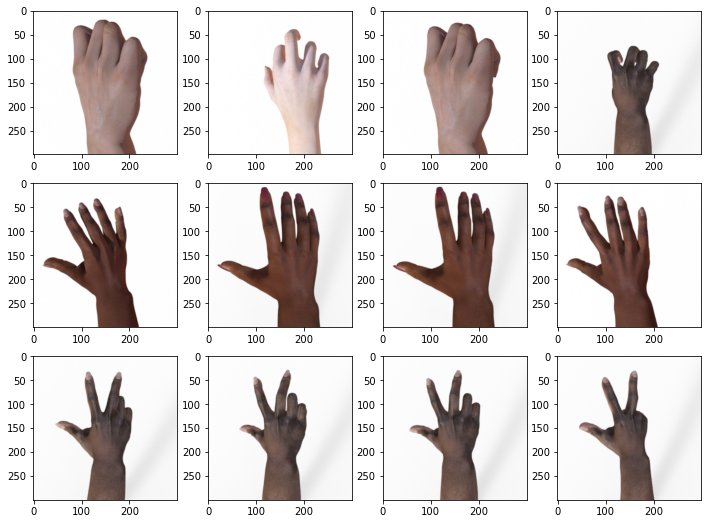

In [73]:
index += step
train_rocks_files = os.listdir(train_dir_rock)
train_papers_files = os.listdir(train_dir_paper)
train_scissors_files = os.listdir(train_dir_scissors)

test_rocks_files = os.listdir(test_dir_rock)
test_papers_files = os.listdir(test_dir_paper)
test_scissors_files = os.listdir(test_dir_scissors)

train_rocks_files_paths = [os.path.join(train_dir_rock, fname) for fname in train_rocks_files[index-step:index]]
train_papers_files_paths = [os.path.join(train_dir_paper, fname) for fname in train_papers_files[index-step:index]]
train_scissors_files_paths = [os.path.join(train_dir_scissors, fname) for fname in train_scissors_files[index-step:index]]

mult = 3
plt.figure(figsize=(n_cols*mult,n_rows*mult))

ls = train_rocks_files_paths + train_papers_files_paths + train_scissors_files_paths
for i, filepath in enumerate(ls):
    sp = plt.subplot(n_rows, n_cols, i + 1)
    filepath = os.path.join(filepath)
    img = keras.preprocessing.image.load_img(filepath)
    arr = keras.preprocessing.image.img_to_array(img) / 255.0
    print(f"Image is of shape: {arr.shape}")
    plt.imshow(arr)

In [77]:
print("Number of training", " rocks are: ", len(train_rocks_files))
print("Number of training", " papers are: ", len(train_papers_files))
print("Number of training", " scissors are: ", len(train_scissors_files))
print("- Total number of training: ", len(train_rocks_files) + len(train_papers_files) + len(train_scissors_files))

print("\nNumber of testing", " rocks are: ", len(test_rocks_files))
print("Number of testing", " papers are: ", len(test_papers_files))
print("Number of testing", " scissors are: ", len(test_scissors_files))
print("- Total number of training: ", len(test_rocks_files) + len(test_papers_files) + len(test_scissors_files))

Number of training  rocks are:  840
Number of training  papers are:  840
Number of training  scissors are:  840
- Total number of training:  2520

Number of testing  rocks are:  124
Number of testing  papers are:  124
Number of testing  scissors are:  124
- Total number of training:  372


In [78]:
training_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                       rotation_range=40,
                                                       height_shift_range=0.2,
                                                       width_shift_range=0.2,
                                                       shear_range=0.2,
                                                       zoom_range=0.2,
                                                       horizontal_flip=True,
                                                       vertical_flip=True,
                                                       fill_mode="nearest")

validation_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [79]:
IMAGE_SIZE = 150

TRAIN_BATCH_SIZE = 21
TEST_BATCH_SIZE = 12
TRAIN_NUMBER_OF_IMAGES = 2520
TEST_NUMBER_OF_IMAGES = 372
TRAIN_STEPS_PER_EPOCH = TRAIN_NUMBER_OF_IMAGES/TRAIN_BATCH_SIZE
TEST_STEPS_PER_EPOCH = TEST_NUMBER_OF_IMAGES/TEST_BATCH_SIZE

training_generator = training_gen.flow_from_directory(train_dir,
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                      batch_size=TRAIN_BATCH_SIZE,
                                                      class_mode="categorical"
                                                     )

validation_generator = validation_gen.flow_from_directory(test_dir,
                                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         batch_size=TEST_BATCH_SIZE,
                                                         class_mode="categorical"
                                                       )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [80]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=512, activation=tf.nn.relu),
    keras.layers.Dense(units=3, activation=tf.nn.softmax)
])

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 128)     

In [82]:
from tensorflow.keras import optimizers, losses

model.compile(
    optimizer=optimizers.Adam(), 
    loss=losses.categorical_crossentropy, 
    metrics=['accuracy'])

In [83]:
history = model.fit(
    training_generator,
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=TEST_STEPS_PER_EPOCH
)

Epoch 1/15


2022-03-18 18:26:49.004457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.1077 - accuracy: 0.3452

2022-03-18 18:26:59.622481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 12s 93ms/step - loss: 1.1077 - accuracy: 0.3452 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 2/15
120/120 [==============================] - 11s 90ms/step - loss: 1.0854 - accuracy: 0.3790 - val_loss: 1.0908 - val_accuracy: 0.3333
Epoch 3/15
120/120 [==============================] - 11s 93ms/step - loss: 1.0780 - accuracy: 0.3960 - val_loss: 1.0173 - val_accuracy: 0.6022
Epoch 4/15
120/120 [==============================] - 10s 86ms/step - loss: 0.9548 - accuracy: 0.5468 - val_loss: 0.7430 - val_accuracy: 0.5538
Epoch 5/15
120/120 [==============================] - 10s 82ms/step - loss: 0.8070 - accuracy: 0.6472 - val_loss: 0.5496 - val_accuracy: 0.8925
Epoch 6/15
120/120 [==============================] - 10s 84ms/step - loss: 0.5890 - accuracy: 0.7579 - val_loss: 0.2898 - val_accuracy: 0.9086
Epoch 7/15
120/120 [==============================] - 11s 89ms/step - loss: 0.4589 - accuracy: 0.8119 - val_loss: 0.2093 - val_accuracy: 0.9409
Epo

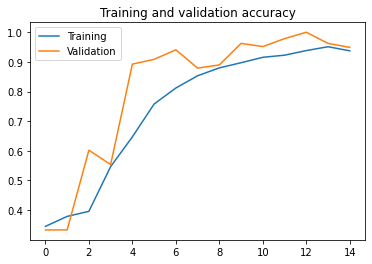

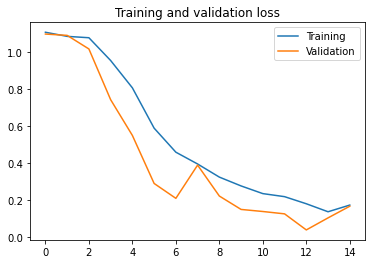

<Figure size 432x288 with 0 Axes>

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

line1, = plt.plot(epochs, acc, label="Training")
line2, = plt.plot(epochs, val_acc, label="Validation")
plt.legend(handles=[line1, line2])
plt.title('Training and validation accuracy')
plt.figure()

line1, = plt.plot(epochs, loss, label="Training")
line2, = plt.plot(epochs, val_loss, label="Validation")
plt.legend(handles=[line1, line2])
plt.title('Training and validation loss')
plt.figure()

plt.show()